# Classifier Decision Boundaries

**Learning Outcomes**

1. Learn how to use contour plots in order to draw decision boundaries
2. Learn how to overlay the dataset classes to visually examine the classifier performance
3. Guide a classifier hyperparameters selection and tuning via its decision boundaries
4. Examine the effect of the hyperparameters (tree depth, splits size and leaf size) on the tree
   performance
5. Optimise hyperparameters using Grid Search method
6. Utilise sklearn cross validation and grid search to find optimal hyperparameters.


## Decision Regions

### Introduction

In this notebook you will run code that allows you to visualize the decision boundaries of any classifier. We use a decision tree since this is the only classifier that we covered so far. However, you should be able to utilize this code later with any other classifier. The main restriction of this visualisation is that it can only apply to a 2d input since we are dealing with a 2d plots of two attributes and how to draw meaningful regions that represent the coloured areas where any point inside this area is going to be classified the same. Each colour corresponds to a class.

You can download a helper function [plotTreeBoundary](https://leeds365-my.sharepoint.com/:u:/g/personal/scsaalt_leeds_ac_uk/EaTUWYJVyhZPhqrFDClSq8QBvte3MCW8Bn47H_HBzxCvPg?e=Jiuex4) and store it in the same folder to be able to use it in the import below.

The following libraries are needed to create the plots

In [1]:
%matplotlib inline
from IPython.display import display, HTML
display(HTML('<style>.container {width: 85% !important}</style>'))

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Below is a helper function to plot the decision boundaries of any classifier (DT, kNN, Perceptron etc.), please do not worry too much about its details, you need to concentrate on the decision boundaries of the different trees as well as on the overfitting phenomena.

First download the dataset from [here](https://leeds365-my.sharepoint.com/:x:/g/personal/scsaalt_leeds_ac_uk/EU1FQ83g7YFJsITFam3YuIYBVPMaMV5xFKZjul6jJHA1rA?e=jAdo5D) and save to a subfolder called 'datasets' which must be created *inside the same folder of this notebook*.

Now load the data via pandas into a numpy array to be ready to pass to decision tree classifier object provided by sklearn

In [4]:
# Load the CSV file into a Pandas DataFrame and convert it to a NumPy array
data = pd.read_csv('DTBoundaryC1C2_5.csv').to_numpy()

# Separate the input features (columns 0 and 1) and target labels (column 2)
X, y = data[:, [0, 1]], data[:, 2]

# Extract the first feature (column 0) from the input data
X1 = X[:, 0]

# Extract the second feature (column 1) from the input data
X2 = X[:, 1]

First we need to get the max and min of each attribute and we go a bit more(0.5) and a bit less(0.5) than these, respectively.

In [5]:
x_min, x_max = X1.min() - 0.5, X1.max() + 0.5  # Define the range for the x-axis by extending the minimum and maximum values of X1 by 0.5 units
y_min, y_max = X2.min() - 0.5, X2.max() + 0.5  # Define the range for the y-axis by extending the minimum and maximum values of X2 by 0.5 units

Now we create a meshgrid in order to cover a surface or area in the 2d
space that is formed by the two attributes X1 and X2
refinement_level = 0.1  represents the distances between one grid point
and the other

**Note**

`np.arrange(start, stop, step)`

- Generates evenly spaced values within a range

`np.meshgrid(x_vals, y_vals)`

- Creates 2D arrays: `xx` and `yy`
- `xx`: copies the `x_vals` row-wise
- `yy`: copies the `y_vals` column-wise


In [6]:
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),  # Generate a grid of x values in the specified range with step size 0.1
                     np.arange(y_min, y_max, 0.1))  # Generate a grid of y values in the specified range with step size 0.1
# Each point in xx and yy represents a point in the 2D space, forming a grid of coordinates.


Now to obtain all possible points we ravel xx and yy, i.e. we flatten them
into a simple vector using xx.ravel(), yy.ravel()‎
then we combine the two vectors into one matrix that have two column:
xx in the first column and yy in the second column

In [7]:
# Combine the raveled (flattened) versions of arrays `xx` and `yy` column-wise to create a 2D array.
X12 = np.c_[xx.ravel(), yy.ravel()]

# Print the first 5 rows and first 5 columns of the combined array `X12`.
print(X12[:5, :5])

# Print the shape of the combined array `X12`.
print(X12.shape)

# Print the shape of the `xx` array (before flattening).
print(xx.shape)

# Print the shape of the `yy` array (before flattening).
print(yy.shape)

# Compute the total number of elements in `yy` (equivalent to the product of its dimensions).
print(yy.shape[0] * yy.shape[1])

[[-20.5         -0.37952567]
 [-20.4         -0.37952567]
 [-20.3         -0.37952567]
 [-20.2         -0.37952567]
 [-20.1         -0.37952567]]
(126690, 2)
(309, 410)
(309, 410)
126690


Now we use the classifier to predict the class which we represent as Z. Note that the points X12 of the mehsgrid do not necessarily correspond to
particular data points in the dataset, they constitute hypothetical data points that would be classified by the classifier in a specific way. We also need to reshape the classification for all of these points on the surface into a 2d array that corresponds to xx or yy.

In [8]:
from sklearn.tree import DecisionTreeClassifier  # Import the DecisionTreeClassifier from scikit-learn

# Initialize a DecisionTreeClassifier with a maximum depth of 8 to limit the tree's growth and prevent overfitting
clf = DecisionTreeClassifier(max_depth=8)

# Fit the decision tree classifier to the dataset using feature matrix X (input) and target vector y (output)
clf.fit(X, y)


DecisionTreeClassifier(max_depth=8)

In [9]:
Z = clf.predict(X12)  # Use the classifier 'clf' to predict labels for the data points in X12
Z = Z.reshape(xx.shape)  # Reshape the predicted labels to match the shape of the grid 'xx' (typically for visualization purposes)

**Plotting decision boundaries**
now we can plot the decision region of the classifier.
The surface area corresponds to the grid that we created using meshgrid
and the contours colours correspond to the predicted classes.
***This is the main trick in this function***.
The more refined the meshgrid is, the more refined and detailed the
coloured areas.


Text(0, 0.5, '$x_2$')

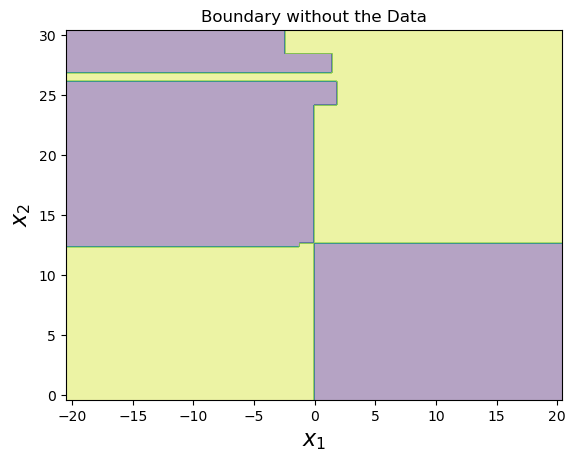

In [10]:
# Plot filled contour lines based on the Z values over the grid defined by xx and yy
plt.contourf(xx, yy, Z, alpha=0.4)  

# Set the title of the plot
plt.title('Boundary without the Data')  

# Label the x-axis as 'x1' with a font size of 16
plt.xlabel('$x_1$', fontsize=16)  

# Label the y-axis as 'x2' with a font size of 16
plt.ylabel('$x_2$', fontsize=16)  


Change the tree depth to see the effect

Now we can overlay the different data points that we actually have in the
dataset to compare them with the decision regions

C:\Users\dylan\AppData\Local\Temp\ipykernel_5956\2258205066.py:10: UserWarning: You passed a edgecolor/edgecolors ('b') for an unfilled marker ('+').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(X1[y == 0], X2[y == 0],     # Select X1 and X2 points where the label y is 0


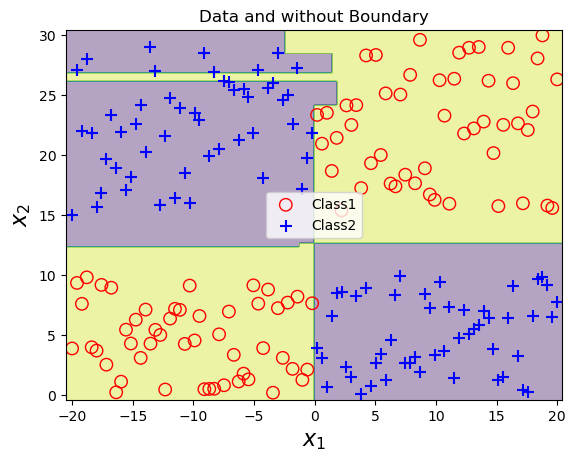

In [11]:
plt.contourf(xx, yy, Z, alpha=0.4)  # Plot the decision boundary as a filled contour plot with transparency (alpha=0.4). Commenting this out will remove the boundary visualization.

# Scatter plot for data points belonging to Class 1
plt.scatter(X1[y == 1], X2[y == 1],     # Select X1 and X2 points where the label y is 1
           facecolors='none',            # Use no fill color (hollow markers)
           marker='o', edgecolor='r',    # Use red edges with circular markers
           s=80, label='Class1')         # Marker size is 80 and label is 'Class1'

# Scatter plot for data points belonging to Class 0
plt.scatter(X1[y == 0], X2[y == 0],     # Select X1 and X2 points where the label y is 0
           facecolors='b',               # Use blue fill color
           marker='+', edgecolor='b',    # Use blue edges with '+' markers
           s=80, label='Class2')         # Marker size is 80 and label is 'Class2'

plt.title('Data and without Boundary')   # Set the title of the plot
plt.xlabel('$x_1$', fontsize=16)         # Label the x-axis with LaTeX-style formatting for 'x_1' and set font size to 16
plt.ylabel('$x_2$', fontsize=16)         # Label the y-axis with LaTeX-style formatting for 'x_2' and set font size to 16
plt.legend()                             # Add a legend to the plot

Let us put everything together in one function.
The full code is below and we will use this function in this and other exercises. We have saved this in .py file so that it can be imported later, we will see an example in another notebook. For now let us focus on how to take advantage of the boundaries.

In [12]:
# Disclaimer: this function has been adopted and modified from a sklearn function
# Plotting classifier decision boundaries
# Decision Regions
# Below is a helper function to plot the decision boundaries of
# any classifier (DT, KNN, Perceptron etc)

def plotTreeBoundary(clf, X1, X2, y, ax, title='Classes Boundaries',
                     fontsize=None, psize=100):
    # clf is the classifier
    # X1 and X2 are the two attributes that constitute the input space in 2d
    # (we cannot plot decision regions in more than 2d)
    # y is the class vector of these records [X1, x2]
    # the rest of the input parameters are self-explanatory.

    # first we need to get the max and min of each attribute and we go a
    # bit more(0.5) and a bit less(0.5) than these, respectively.
    x_min, x_max = X1.min() - 0.5, X1.max() + 0.5
    y_min, y_max = X2.min() - 0.5, X2.max() + 0.5

    # now we create a meshgrid in order to cover a surface or area in the 2d
    # space that is formed by the two attributes X1 and X2
    # refinement_level = 0.1 reprsents the distances between one grid point
    # and the other.
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))
    # each point in xx and yy reprsents a point in the 2d space

    # to obtain all possible points, we ravel xx and yy, i.e. we flatten them
    # into a simple vector using xx.ravel(), yy.ravel()
    # then we combine the two vectors into one matrix that have two columns,
    # xx in the first column and yy in the second column
    X12 = np.c_[xx.ravel(), yy.ravel()]

    # now we use the classifier to predict the class which we represent as Z
    Z = clf.predict(X12)
    # note that the points X12 of the mehsgrid do not necessarily correspond to
    # particular datapoints in the dataset, they constitute hypothetical
    # datapoints that would be classified by the classifier in a specific way

    # now we need to reshape the classificaiton for all of these points on the
    # surface into a 2d array that corresponds to xx or yy
    Z = Z.reshape(xx.shape)

    # **plotting decision boundaries**
    # now we can plot the decision region of the classifer
    # the surface area correspond to the grid that we created using meshgrid
    # and the contours colours correspond with the predicted classes.
    # The more refined the meshgrid is, the more refined and detailed the
    # coloured areas.

    ax.contourf(xx, yy, Z, alpha=0.4)

    # now we can plot the different data points that we actually have in the
    # dataset to compare them with the decision regions
    ax.scatter(X1[y == 1], X2[y == 1],     facecolors='none',
               marker='o', edgecolor='r', s=0.8*psize, label='Class1')
    ax.scatter(X1[y == 0], X2[y == 0],     facecolors='b',
               marker='+', edgecolor='b', s=1.0*psize, label='Class2')
    # The above two lines can be replaced by the below
    # (but you will not be able to change the marker though)
    # ax.scatter(X1, X2, c=Y, edgecolor='k')

    # set title and labels and show the legend for the plot
    ax.set_title(title)
    ax.set_xlabel('$x_1$', fontsize=16)
    ax.set_ylabel('$x_2$', fontsize=16)
    ax.legend()

Now we are ready to utilize the boundary function that we have developed.

## Decision Boundaries to Guide the Process of  Model Fitting

In [13]:
from sklearn.tree import plot_tree
from sklearn.tree import DecisionTreeClassifier
from itertools import product

Now we try our decision  boundary function on a decision tree. To do so, we load the data via pandas into a numpy array to be ready to pass to decision tree classifier object provided by sklearn.

In [14]:
# Read the data from a CSV file and convert it to a NumPy array
data = pd.read_csv('DTBoundaryC1C2_5.csv').to_numpy()

# Split the data into features (X) and labels (y)
# Features (X): Select columns 0 and 1 as input features
# Labels (y): Select column 2 as the target variable
X, y = data[:, [0, 1]], data[:, 2]


Now let us create and fit the DT model

In [15]:
# Initialize a Decision Tree Classifier with a maximum depth of 3
clf = DecisionTreeClassifier(max_depth=3)  

# Fit the decision tree classifier to the training data (X: features, y: target labels)
clf.fit(X, y)  

DecisionTreeClassifier(max_depth=3)

C:\Users\dylan\AppData\Local\Temp\ipykernel_5956\3280466245.py:56: UserWarning: You passed a edgecolor/edgecolors ('b') for an unfilled marker ('+').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(X1[y == 0], X2[y == 0],     facecolors='b',


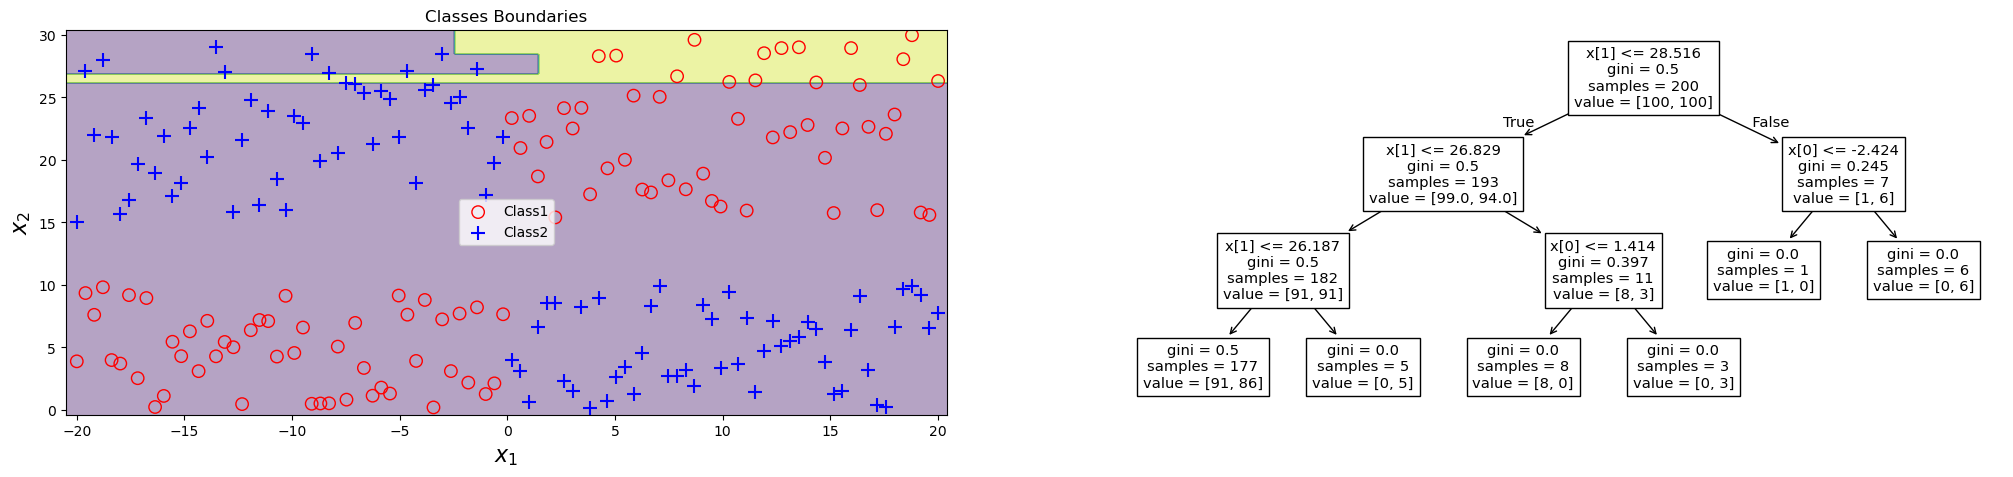

In [16]:
# Create a figure with two subplots arranged in one row and two columns, and set the overall figure size
fig, ax = plt.subplots(1, 2, figsize=(25, 5))

# Plot the decision boundary of the classifier `clf` for the first two features of the dataset `X` on the first subplot
# `X[:,0]` and `X[:,1]` are the first and second features, and `y` is the target variable
plotTreeBoundary(clf, X[:,0], X[:,1], y, ax=ax[0])

# Visualize the structure of the decision tree `clf` in the second subplot
plot_tree(clf)

# Display the figure with the two plots
plt.show()


In the above figure, the yellow region represents the negative class and blue region represents the positive class.

C:\Users\dylan\AppData\Local\Temp\ipykernel_5956\3280466245.py:56: UserWarning: You passed a edgecolor/edgecolors ('b') for an unfilled marker ('+').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(X1[y == 0], X2[y == 0],     facecolors='b',


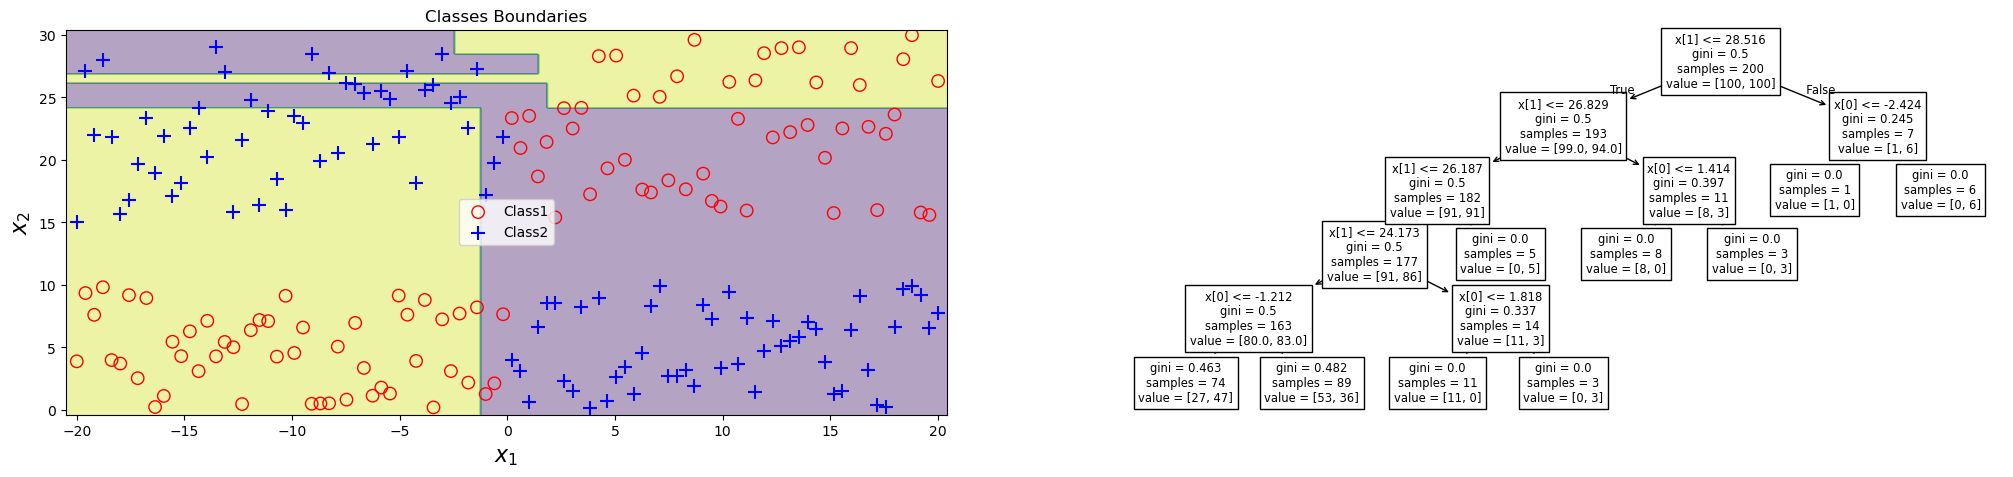

In [17]:
# Initialize a Decision Tree Classifier with a maximum depth of 3
clf_d5 = DecisionTreeClassifier(max_depth=5)  

# Fit the decision tree classifier to the training data (X: features, y: target labels)
clf_d5.fit(X, y)  

# Create a figure with two subplots arranged in one row and two columns, and set the overall figure size
fig, ax = plt.subplots(1, 2, figsize=(25, 5))

# Plot the decision boundary of the classifier `clf` for the first two features of the dataset `X` on the first subplot
# `X[:,0]` and `X[:,1]` are the first and second features, and `y` is the target variable
plotTreeBoundary(clf_d5, X[:,0], X[:,1], y, ax=ax[0])

# Visualize the structure of the decision tree `clf` in the second subplot
plot_tree(clf_d5)

# Display the figure with the two plots
plt.show()


C:\Users\dylan\AppData\Local\Temp\ipykernel_5956\3280466245.py:56: UserWarning: You passed a edgecolor/edgecolors ('b') for an unfilled marker ('+').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(X1[y == 0], X2[y == 0],     facecolors='b',


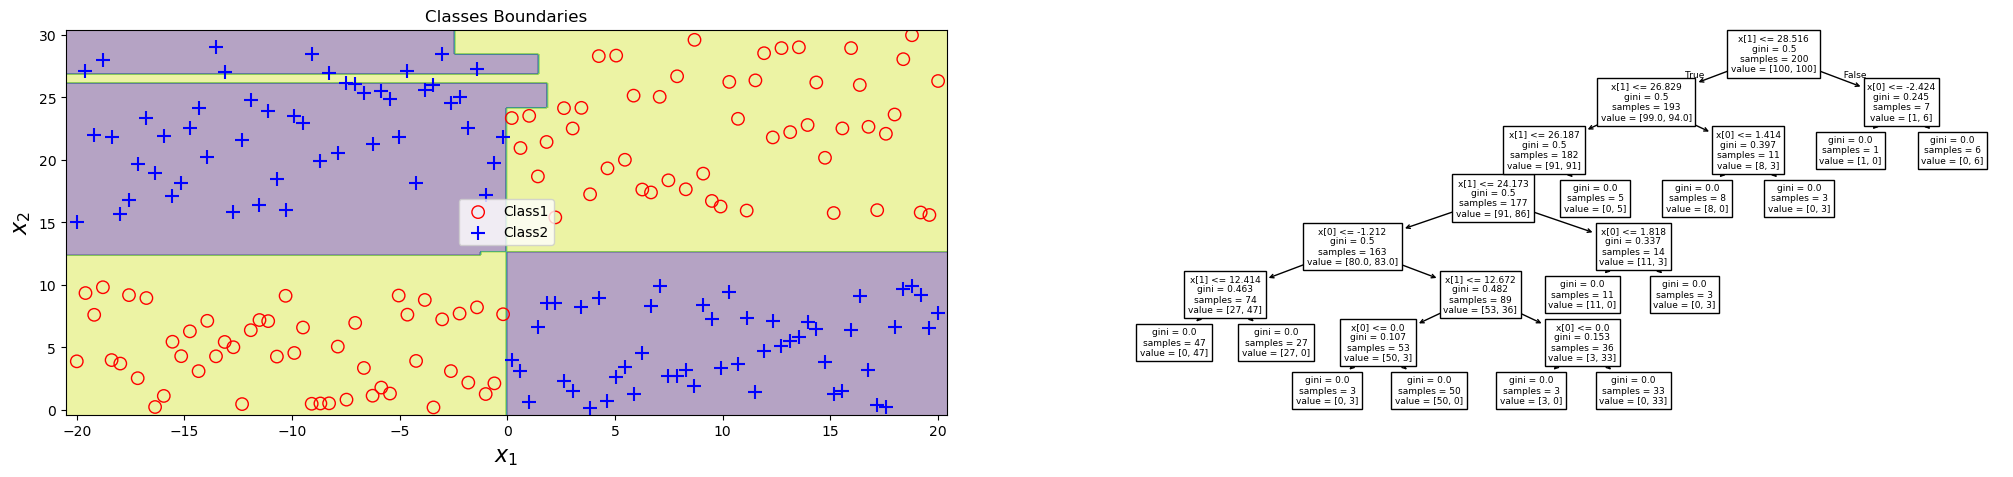

In [18]:
# Initialize a Decision Tree Classifier with a maximum depth of 3
clf_d7 = DecisionTreeClassifier(max_depth=7)  

# Fit the decision tree classifier to the training data (X: features, y: target labels)
clf_d7.fit(X, y)  

# Create a figure with two subplots arranged in one row and two columns, and set the overall figure size
fig, ax = plt.subplots(1, 2, figsize=(25, 5))

# Plot the decision boundary of the classifier `clf` for the first two features of the dataset `X` on the first subplot
# `X[:,0]` and `X[:,1]` are the first and second features, and `y` is the target variable
plotTreeBoundary(clf_d7, X[:,0], X[:,1], y, ax=ax[0])

# Visualize the structure of the decision tree `clf` in the second subplot
plot_tree(clf_d7)

# Display the figure with the two plots
plt.show()


### Reflection

As you can see the DT has not done a great job in terms of classifying this dataset. 
You should now reflect and think why this is the case before you move to the next sections. Try to vary the depth to see if that helps.


Alright, let's try out trees of different depths to see how the plot evolve.

### Interpreting the results

The reason for the above issue is that the DT **hyper parameters** need adjustment in order to suit the dataset. This is an important step in any model fitting process and often it is a trial and error-based process that is done either manually or automatically. 

- By using hyper parameters optimisation procedure we can choose the best set of hyper parameters but it is computationally an expensive process. 

- For this small dataset you will not notice a long processing time, but for larger datasets it can take days to run an optimiser to come up with a best hyper parameter settings especially if we are employing a Grid Search methods on a number of hyper parameters. The cost grows exponentially! so we have to be mindful when we add a hyper parameter that we really need it.

Below we will explore the effect of max_depth and then we can adjust other parameters such as the min_samples_leaf and min_sample_split of the tree.

## Varying the Decision Tree Depth

Now let us try the depth of the tree and see the effect on the decision boundaries. To do so we take the previous cell code and we convert it to a function and we pass the max_depth to it. Then we loop through several depths and we call the new function accordingly.

**Task for you** ideally we should pass X and y as well. we leave this task for you.

In [19]:
def fit_plot_DT(max_depth):
    # Create a DecisionTreeClassifier object with a specified maximum depth
    clf = DecisionTreeClassifier(max_depth=max_depth)
    
    # Fit the classifier to the data (X is the feature matrix, y is the target vector)
    clf.fit(X, y)

    # Create a figure with 1 row and 2 columns of subplots, setting the overall figure size
    _, ax = plt.subplots(1, 2, figsize=(25, 5))

    # Plot the decision boundary of the trained decision tree classifier
    # Using the first two features (X[:, 0] and X[:, 1]) and color-coding by class labels (y)
    # Display this plot on the first subplot (ax[0]) with a custom title
    plotTreeBoundary(clf, X[:, 0], X[:, 1], y, ax=ax[0], title='depth' + str(d), fontsize=10)
    
    # Plot the structure of the decision tree on the second subplot
    plot_tree(clf)

    # Display both plots
    plt.show()


Ok, now we are ready to vary the depth

C:\Users\dylan\AppData\Local\Temp\ipykernel_5956\3280466245.py:56: UserWarning: You passed a edgecolor/edgecolors ('b') for an unfilled marker ('+').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(X1[y == 0], X2[y == 0],     facecolors='b',


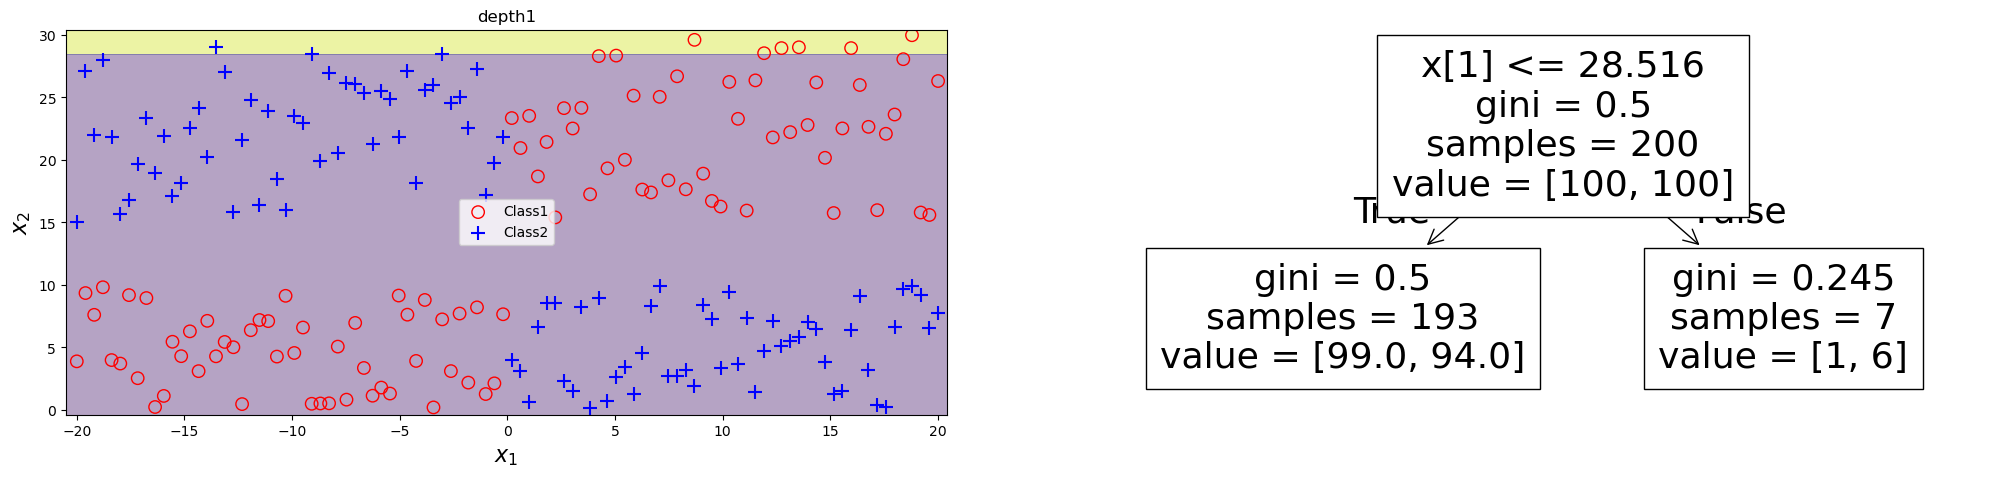

C:\Users\dylan\AppData\Local\Temp\ipykernel_5956\3280466245.py:56: UserWarning: You passed a edgecolor/edgecolors ('b') for an unfilled marker ('+').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(X1[y == 0], X2[y == 0],     facecolors='b',


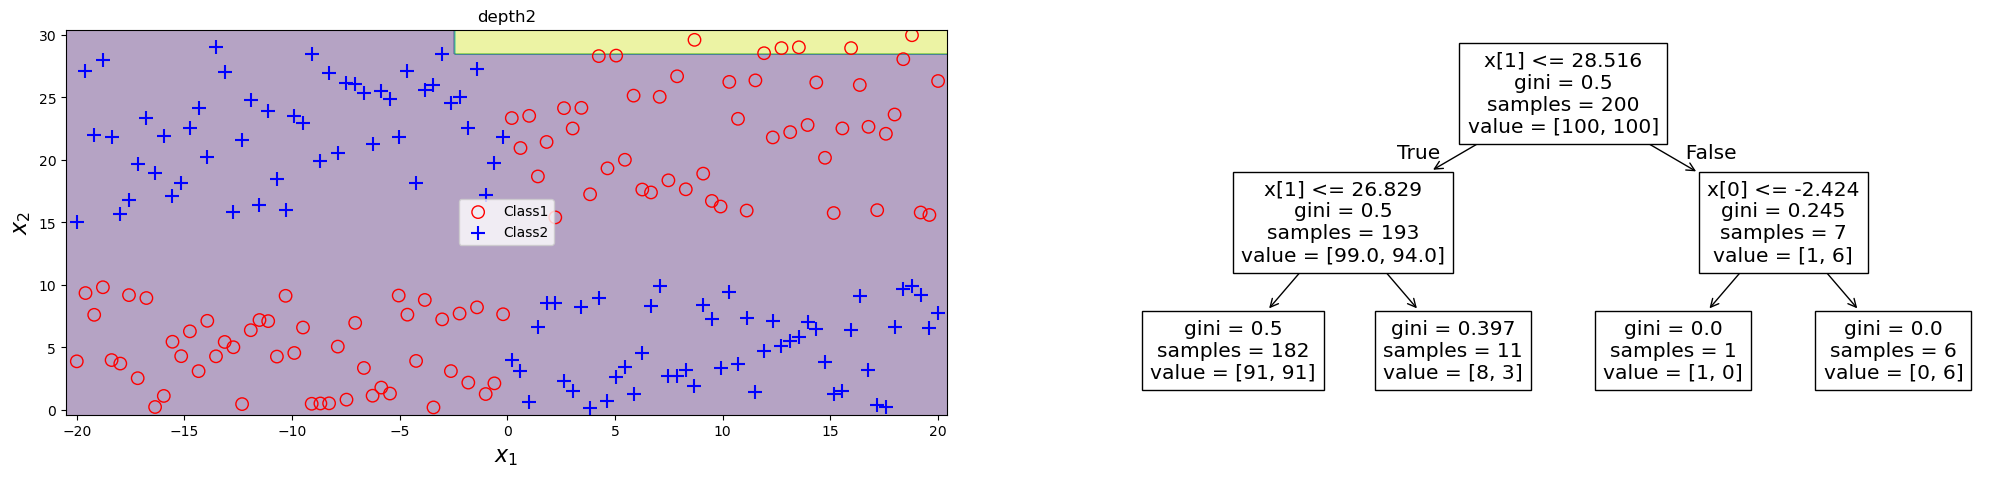

C:\Users\dylan\AppData\Local\Temp\ipykernel_5956\3280466245.py:56: UserWarning: You passed a edgecolor/edgecolors ('b') for an unfilled marker ('+').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(X1[y == 0], X2[y == 0],     facecolors='b',


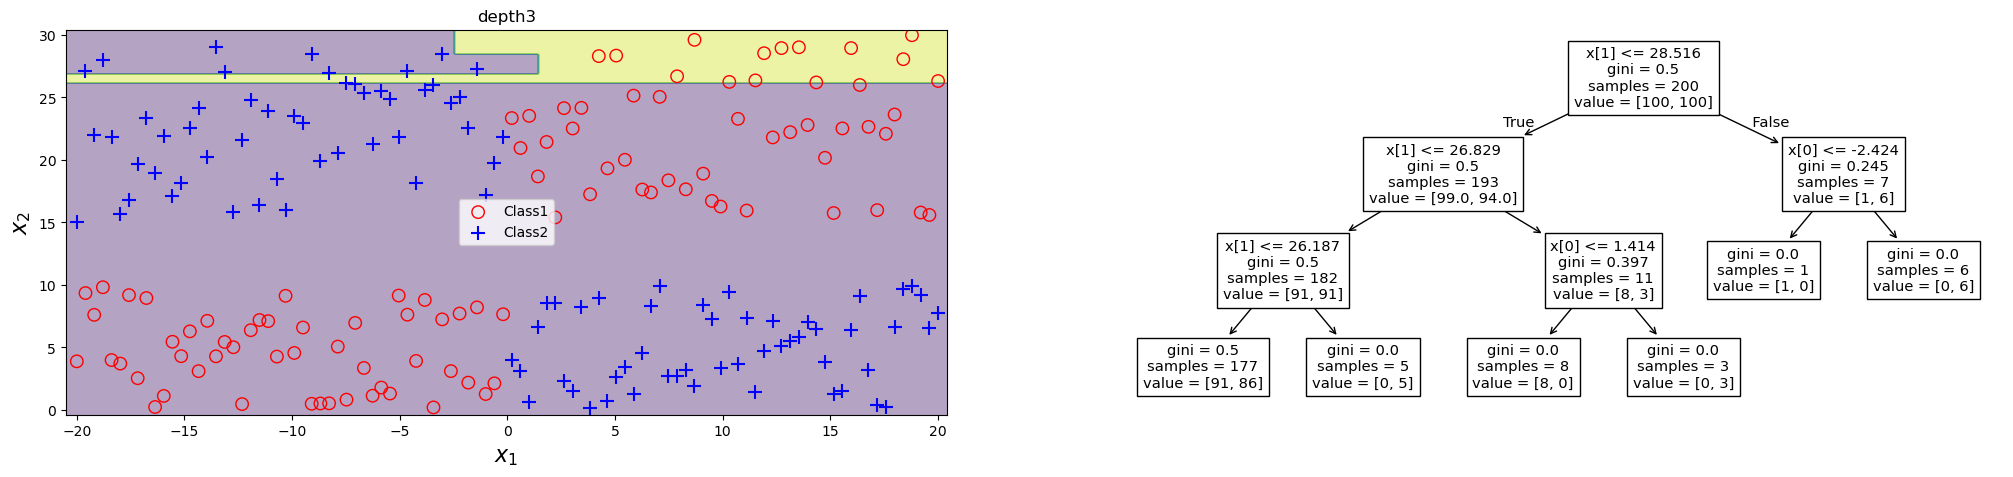

C:\Users\dylan\AppData\Local\Temp\ipykernel_5956\3280466245.py:56: UserWarning: You passed a edgecolor/edgecolors ('b') for an unfilled marker ('+').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(X1[y == 0], X2[y == 0],     facecolors='b',


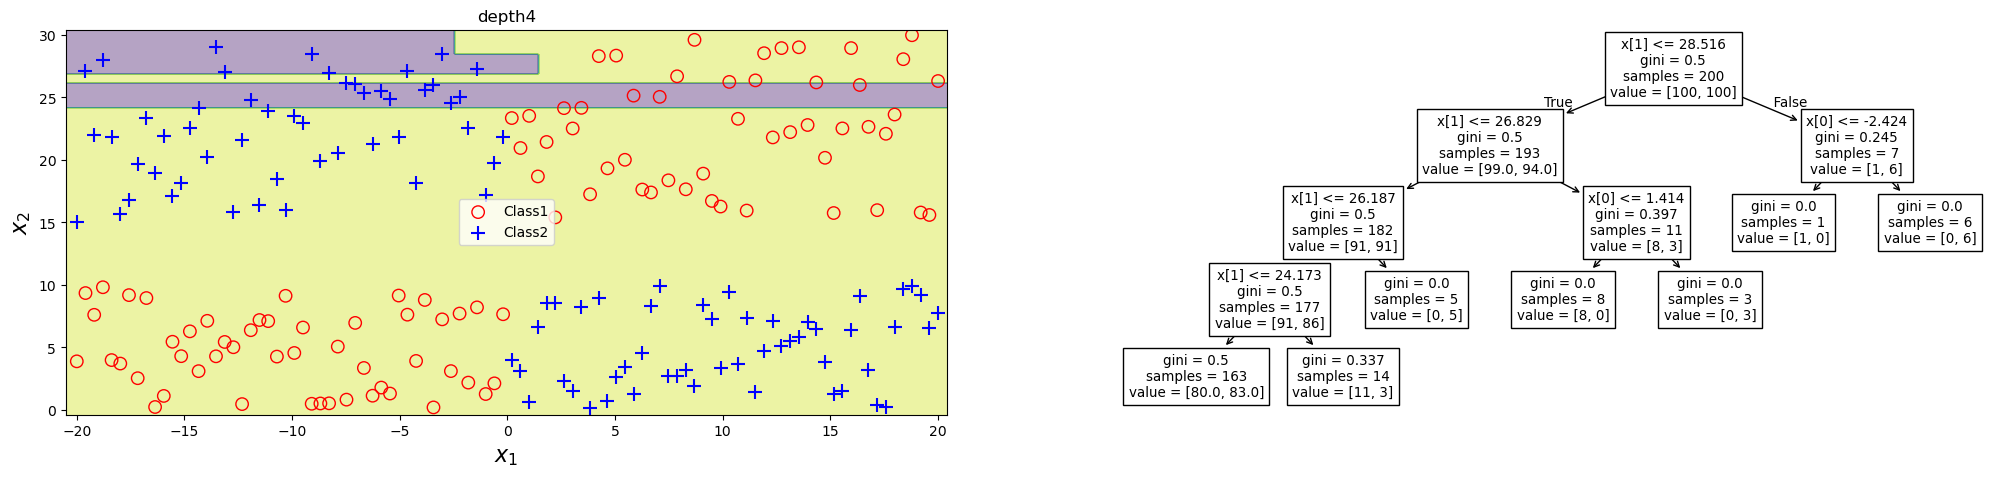

C:\Users\dylan\AppData\Local\Temp\ipykernel_5956\3280466245.py:56: UserWarning: You passed a edgecolor/edgecolors ('b') for an unfilled marker ('+').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(X1[y == 0], X2[y == 0],     facecolors='b',


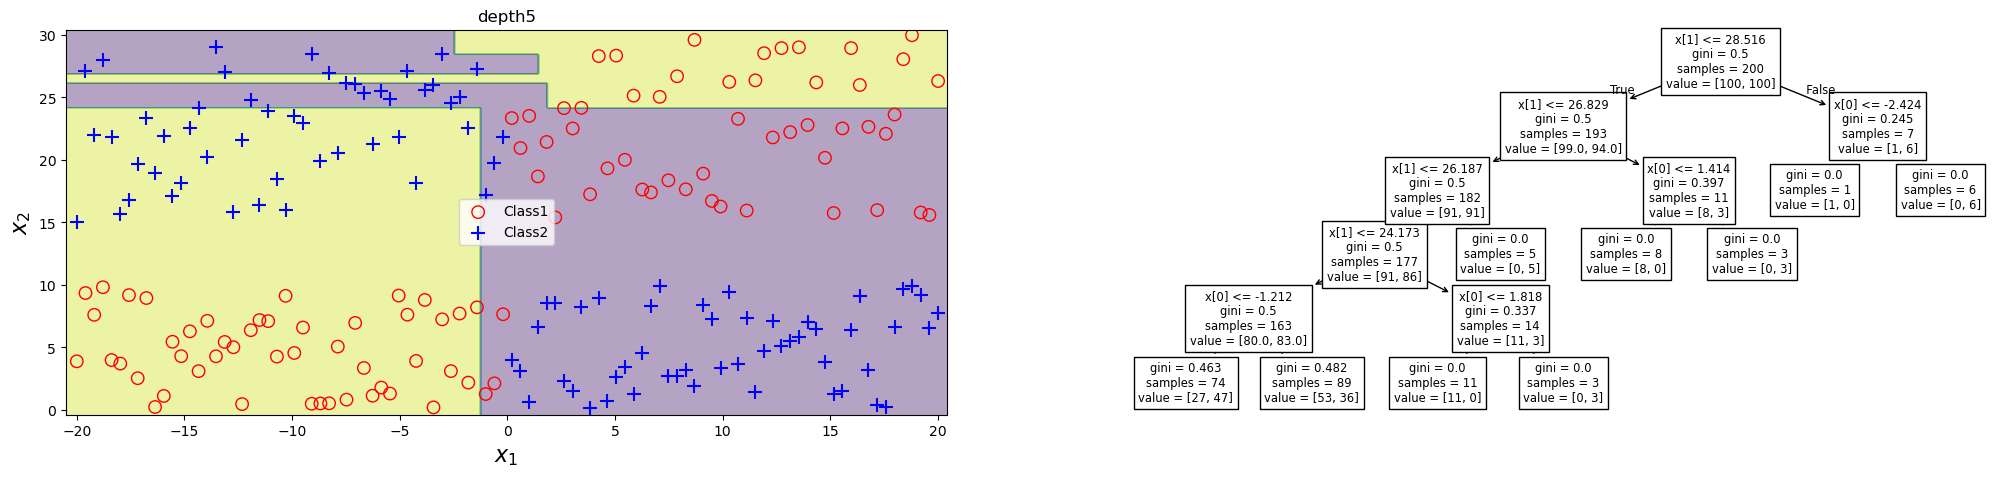

C:\Users\dylan\AppData\Local\Temp\ipykernel_5956\3280466245.py:56: UserWarning: You passed a edgecolor/edgecolors ('b') for an unfilled marker ('+').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(X1[y == 0], X2[y == 0],     facecolors='b',


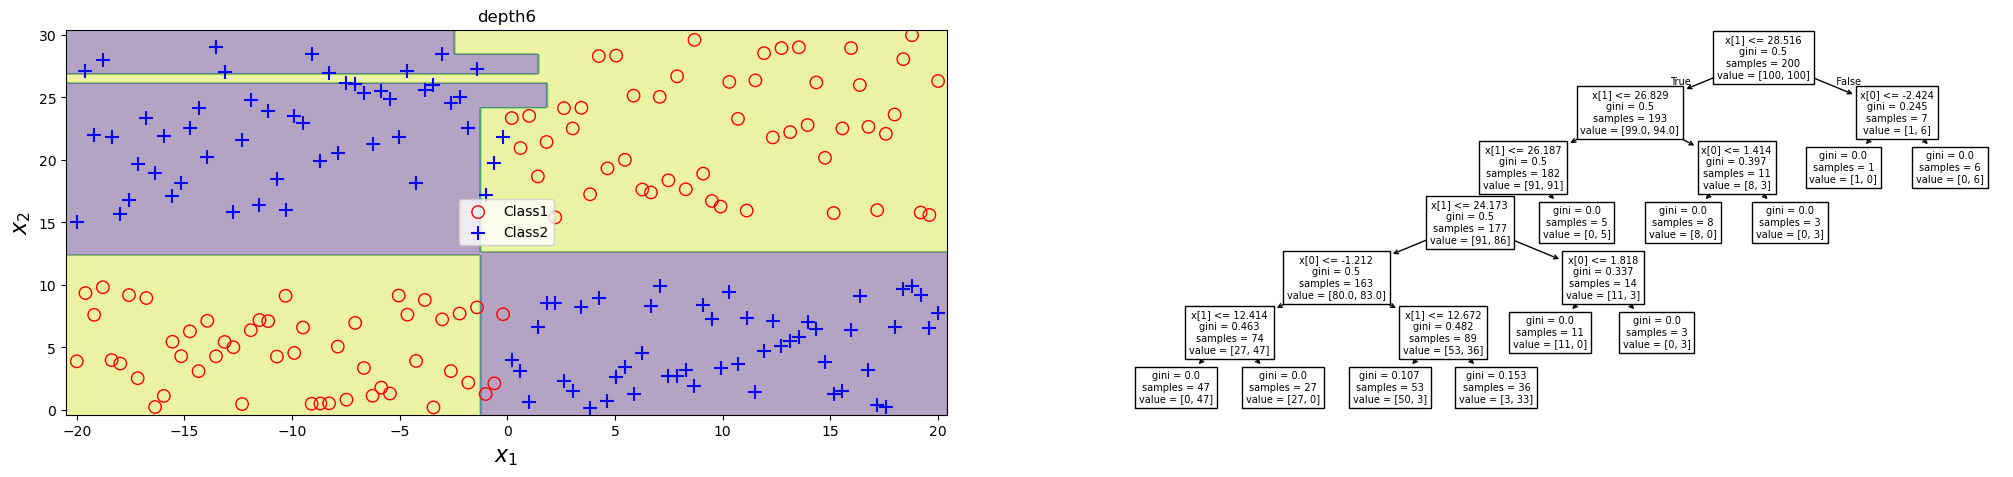

C:\Users\dylan\AppData\Local\Temp\ipykernel_5956\3280466245.py:56: UserWarning: You passed a edgecolor/edgecolors ('b') for an unfilled marker ('+').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(X1[y == 0], X2[y == 0],     facecolors='b',


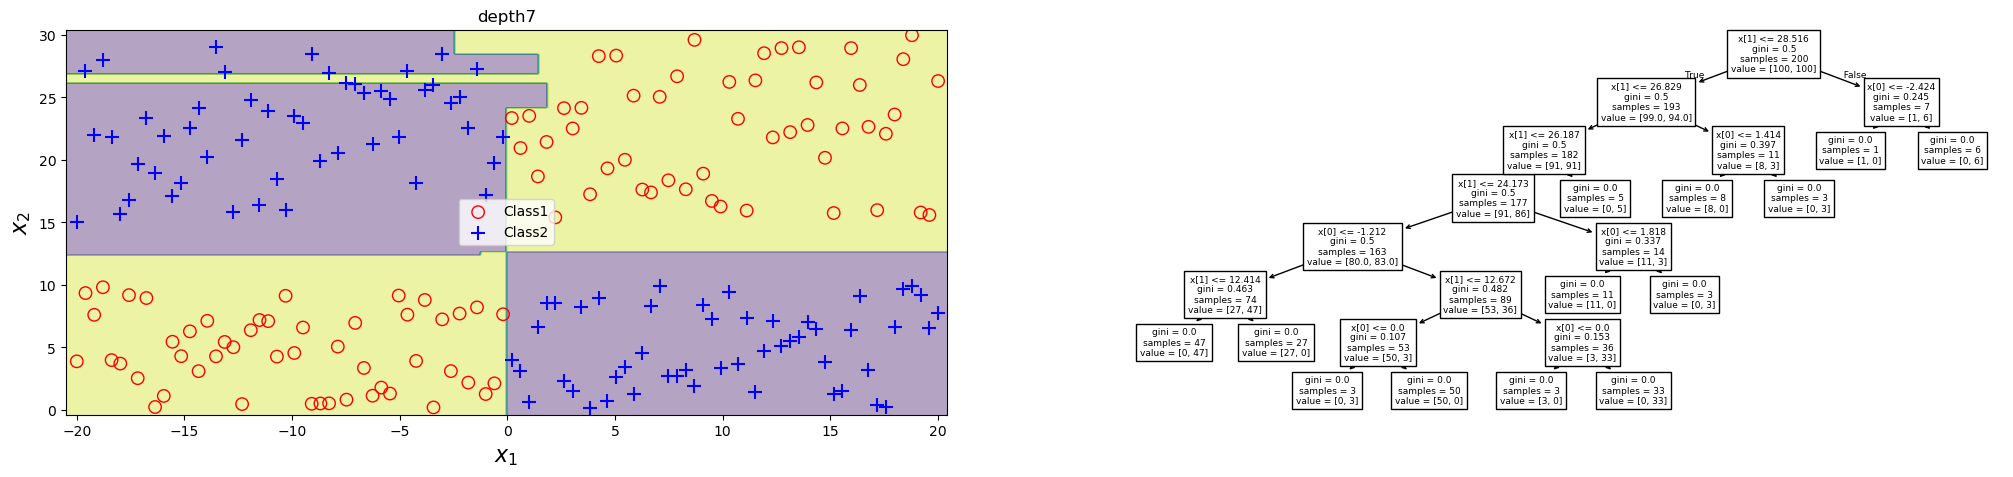

In [20]:
# Define a list of maximum depths for the decision tree
max_depths = np.arange(1, 8)

# Loop through each maximum depth value in the list
for d in max_depths:
    # Call the fit_plot_DT function with the current maximum depth value
    # This function presumably fits a decision tree model with the specified maximum depth
    # and generates a plot to visualize the results
    fit_plot_DT(max_depth=d)

In [27]:
np.arange(1, 6)

array([1, 2, 3, 4, 5])

### Interpreting the results

As we can see the decision tree classifier performed better job when we increased the max_depth of the tree. 

But there are some evidence of overfitting where the boundaries started to take irregular shapes unnecessary for this dataset and this can be improved.

There is some misclassification around the boundaries and the depth seems excessive for such simple dataset.


### Reflection
Ok again it is time to reflect. Think how we can improve the situation further. We know that a DT can classify this type of dataset because the classes’ boundaries are rectilinear.

The dataset is divided into four quarters. It is non-linearly separable but rectilinearly separable. So a depth of 4 should be enough for it to be classified.

Below we will explore the effect of max_depth combined with the min_samples_leaf and min_sample_split hyper parameters.
We will see that we do not need more than a depth of 4 if we adjust the other two variables suitably.


In [21]:
# Importing the accuracy_score function from scikit-learn for model evaluation
from sklearn.metrics import accuracy_score

# Defining a function to fit a Decision Tree, evaluate its accuracy, and optionally plot the results
def fit_plot_DT(max_depth, min_leaf, min_split, min_impurity, plot=False):
    # Create a DecisionTreeClassifier object with the specified hyperparameters
    clf = DecisionTreeClassifier(max_depth=max_depth, 
                                 min_samples_leaf=min_leaf, 
                                 min_samples_split=min_split, 
                                 min_impurity_decrease=min_impurity)
    
    # Fit the decision tree model to the dataset X (features) and y (target)
    clf.fit(X, y)
    
    # Calculate the accuracy of the model on the training data
    accuracy = accuracy_score(y, clf.predict(X))  # Optionally, normalize=False can be specified
    
    # If plot=True, visualize the decision boundaries and the tree structure
    if plot:
        # Create subplots for visualization
        _, ax = plt.subplots(1, 2, figsize=(20, 5))
        
        # Plot the decision boundaries using a custom function plotTreeBoundary
        plotTreeBoundary(clf, X[:, 0], X[:, 1], y, ax=ax[0], 
                         title='depth'+str(d), fontsize=10)
        
        # Plot the decision tree structure using scikit-learn's plot_tree function
        plot_tree(clf)
        
        # Display the plots
        plt.show()
    
    # Return the model's accuracy and the trained classifier object
    return accuracy, clf

### Grid Search

Recall that 
**Grid Search** is a hyperparameter optimization technique used to systematically search for the best combination of hyperparameters for a decision tree (or any machine learning model). In the context of a decision tree, hyperparameters such as **maximum tree depth**, **minimum samples per leaf**, **maximum number of features**, and **criterion** (e.g., Gini impurity or entropy) can significantly influence the model's performance and ability to generalize.

Grid Search works by defining a grid of hyperparameter values and exhaustively evaluating the model's performance for each combination of parameters. This is typically done using cross-validation to ensure the model is evaluated robustly on unseen data.

#### Steps for Grid Search in Decision Tree:
1. **Define the parameter grid:** Specify the ranges or discrete values for each hyperparameter (e.g., max depth: [3, 5, 10], min samples per leaf: [1, 5, 10]).
2. **Train models for each combination:** The decision tree is trained on the training set for all combinations of the hyperparameters in the grid.
3. **Evaluate using cross-validation:** Each combination is evaluated using metrics like accuracy, precision, recall, or F1-score, based on cross-validation splits.
4. **Select the best parameters:** The combination of hyperparameters that yields the highest performance is chosen as the optimal set.

#### Example:
For a decision tree, Grid Search might involve:
- **Max depth:** [3, 5, 10]
- **Min samples split:** [2, 4, 6]
- **Criterion:** ["gini", "entropy"]

Grid Search would train and evaluate a decision tree for all 3 × 3 × 2 = 18 combinations to identify the best-performing configuration.

#### Advantages:
- Ensures systematic exploration of hyperparameters.
- Can lead to a significant improvement in model performance.

#### Limitation:
- Computationally expensive, especially for large datasets or a large number of hyperparameter combinations.

Grid Search is a powerful tool for fine-tuning decision trees, helping to balance complexity and generalization for better model performance.lement our own Grid Search.

In [25]:
# The below parameters can be replaced by np.arange(1, k), but we show explicit values 
# to allow easier experimentation and parameter tuning.
max_depths = [1, 2, 3, 4, 5, 6, 8, 9, 10, 12, 13, 14, 15]  # List of possible maximum depths for the decision tree
min_leafs = [5, 10, 20, 30, 40, 50, 60, 70]               # List of possible minimum leaf sizes
min_splits = [10, 20, 30, 40, 50, 60, 70]                 # List of possible minimum splits for internal nodes
min_impurity = [0.0001, 0.0005, 0.001, 0.005, 0.01, 
                0.05, 0.1, 0.2, 0.5, 0.9]                # List of possible minimum impurity decrease thresholds
max_accuracy = 0  # Initialize variable to store the highest accuracy found
clf = []           # Initialize variable to store the best classifier

# Iterate through all combinations of parameters to find the optimal configuration
for d in max_depths:               # Loop through each maximum depth value
    for f in min_leafs:            # Loop through each minimum leaf size
        for s in min_splits:       # Loop through each minimum split value
            for i in min_impurity: # Loop through each minimum impurity threshold
                # Fit a decision tree with the current parameter combination and evaluate its accuracy
                accuracy, clf = fit_plot_DT(max_depth=d, min_leaf=f, min_split=s, min_impurity=i)
                
                # If the current accuracy is greater than or equal to the maximum accuracy so far,
                # update the maximum accuracy and store the corresponding parameter values
                if accuracy >= max_accuracy: 
                    max_accuracy = accuracy
                    max_d = d
                    min_f = f
                    min_s = s
                    min_i = i
                    best_clf = clf

# Print the best accuracy and the associated parameter values
print('max_accuracy={}, max_depth={}, min_leaf={}, min_split={}, min_impurity={}'.format(
       max_accuracy, max_d, min_f, min_s, min_i))

max_accuracy=0.955, max_depth=15, min_leaf=5, min_split=10, min_impurity=0.005


### Final Optimal Tree Classifier

Finally the resultant tree can be established via the above optimal hyper parameters. Below we show the final tree and its boundaries.

7


C:\Users\dylan\AppData\Local\Temp\ipykernel_5956\3280466245.py:56: UserWarning: You passed a edgecolor/edgecolors ('b') for an unfilled marker ('+').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(X1[y == 0], X2[y == 0],     facecolors='b',


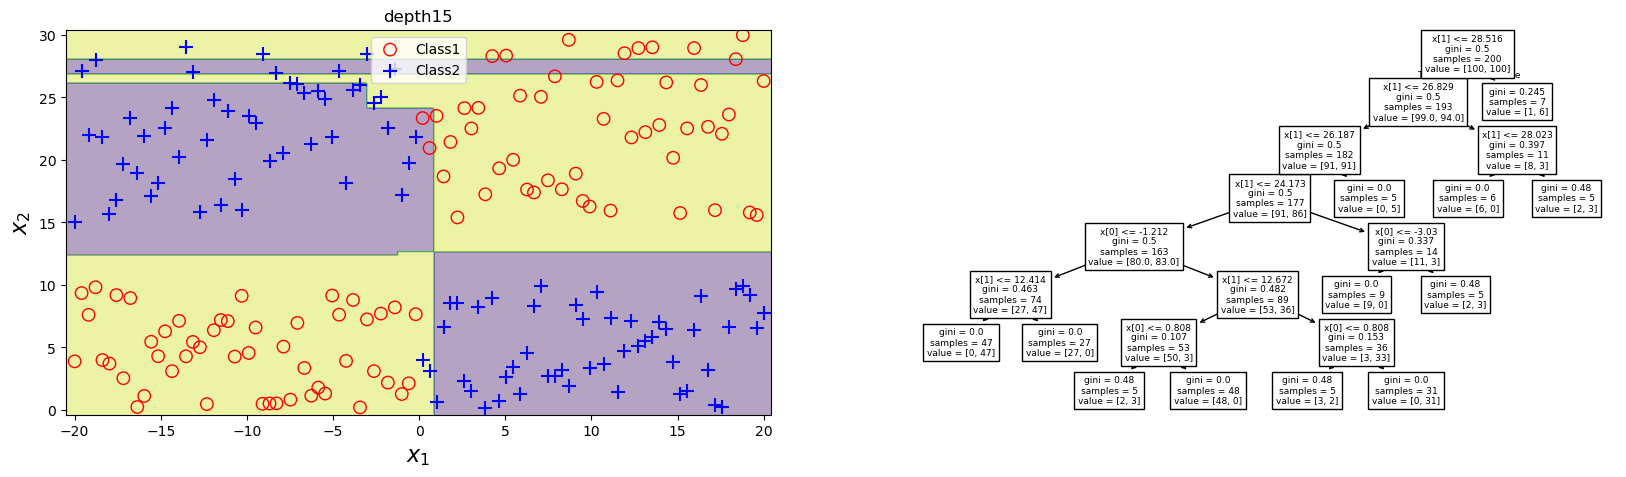

(0.955,
 DecisionTreeClassifier(max_depth=15, min_impurity_decrease=0.005,
                        min_samples_leaf=5, min_samples_split=10))

In [26]:
# Print the depth of the decision tree model after training
print(best_clf.get_depth())

# Call the function to fit and plot the Decision Tree model with specified parameters
# Parameters:
# max_depth: Maximum depth of the tree
# min_leaf: Minimum number of samples required to be at a leaf node
# min_split: Minimum number of samples required to split an internal node
# min_impurity: Minimum impurity decrease required to split a node
# plot: If True, generates a plot of the decision tree
fit_plot_DT(max_depth=max_d, min_leaf=min_f, min_split=min_s, min_impurity=min_i, plot=True)


### Your Turn to Try Something Out!

Note that the max_depth is not necessarily the depth that we ended up with in the tree. Since the other hyper parameters often cause the tree to stop growing. In fact max_depth has no effect in this case. Try to increase and decrease its value. It is your turn to try something out!

1. Split into Training and Testing. In all of the above we have not split the data into training and testing. This is not recommended you would need to implement a suitable splitting functionality and then train on the training set and test on the testing set.


2. Even when we split into testing training, the results are not very reliable since our dataset is small. We need to employ cross validations. Luckily sklearn provides this quite conveniently. You have just to implement it.  


3. Below we show how to do both cross validation and grid search in one go. Try to separate these if you want as an exercise. Bear in mind however that these are often performed together.


### The Task

Your task is to implement the Grid Search using sklearn libraries. Yes, there is a set of functions that you can directly call and they will do the job for you, :-)

The above implementation should give you a thorough idea of the optimisation process and what it entails. Check the following [example](https://scikit-learn.org/stable/auto_examples/model_selection/plot_multi_metric_evaluation.html#sphx-glr-auto-examples-model-selection-plot-multi-metric-evaluation-py) for an example.

The exercise implements a cross validation in the context of a decision trees.


In [29]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer

# Perform grid search to find the best hyperparameters for a Decision Tree Classifier
DT_GS = GridSearchCV(
    DecisionTreeClassifier(random_state=42),  # Initialize the Decision Tree Classifier with a fixed random state
    param_grid={                             # Define the hyperparameter search space
        'min_samples_split': range(2, 40, 10),  # Test values for the minimum number of samples required to split
        'max_depth': range(2, 20, 5),           # Test values for the maximum depth of the tree
        'min_samples_leaf': range(10, 70, 10)   # Test values for the minimum number of samples in a leaf node
    },
    scoring=make_scorer(accuracy_score),  # Use accuracy as the evaluation metric
    return_train_score=True,               # Retain the training scores for analysis
    cv=3 # add this argument to modify cross validation
)

# Fit the model on the provided dataset (X and y)
DT_GS.fit(X, y)

# Retrieve the cross-validation results
results = DT_GS.cv_results_

# Print the mean accuracy score for each parameter combination
print(results['mean_test_score'])

# Print the maximum mean test score across all parameter combinations
print(results['mean_test_score'].max())

# Print the standard deviation of test scores for the best performing parameter set
print(results['std_test_score'].max())

[0.82587065 0.82587065 0.82587065 0.82587065 0.82089552 0.82089552
 0.82089552 0.82089552 0.88059701 0.88059701 0.88059701 0.88059701
 0.21393035 0.21393035 0.21393035 0.21393035 0.15422886 0.15422886
 0.15422886 0.15422886 0.1641791  0.1641791  0.1641791  0.1641791
 0.8358209  0.8358209  0.8358209  0.8358209  0.8358209  0.8358209
 0.8358209  0.8358209  0.88059701 0.88059701 0.88059701 0.88059701
 0.21393035 0.21393035 0.21393035 0.21393035 0.15422886 0.15422886
 0.15422886 0.15422886 0.1641791  0.1641791  0.1641791  0.1641791
 0.8358209  0.8358209  0.8358209  0.8358209  0.8358209  0.8358209
 0.8358209  0.8358209  0.88059701 0.88059701 0.88059701 0.88059701
 0.21393035 0.21393035 0.21393035 0.21393035 0.15422886 0.15422886
 0.15422886 0.15422886 0.1641791  0.1641791  0.1641791  0.1641791
 0.8358209  0.8358209  0.8358209  0.8358209  0.8358209  0.8358209
 0.8358209  0.8358209  0.88059701 0.88059701 0.88059701 0.88059701
 0.21393035 0.21393035 0.21393035 0.21393035 0.15422886 0.15422886
 